## Exercise 1: Identify the Target Variable and Related KPIs from the Given Data for the Business Problem

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import time
import re
import os
import matplotlib.pyplot as plt
sns.set(style="ticks")


In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/TrainingByPackt/Big-Data-Analysis-with-Python/master/Lesson07/Dataset/bank.csv', sep=';')
df.head(5)
print(df.shape)
df.head(5)
df.info()
df.describe()


(4521, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


no     4000
yes     521
Name: y, dtype: int64

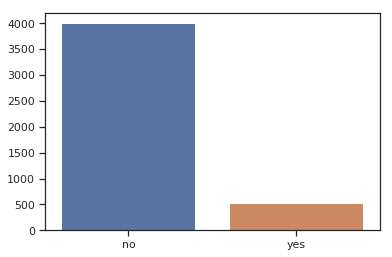

In [0]:
count_number_susbc = df["y"].value_counts()
sns.barplot(count_number_susbc.index, count_number_susbc.values)

df['y'].value_counts()

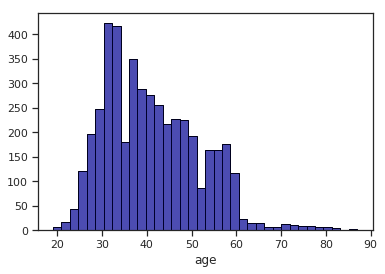

In [0]:
# histogram for age (using matplotlib)
plt.hist(df['age'], color = 'grey', edgecolor = 'black',
         bins = int(180/5))

# histogram for age (using seaborn)
sns.distplot(df['age'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})


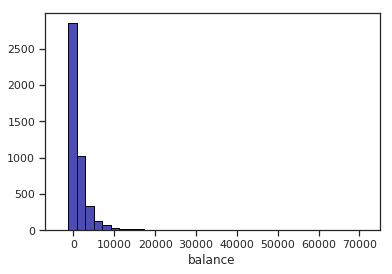

In [0]:
# histogram for balance (using matplotlib)
plt.hist(df['balance'], color = 'grey', edgecolor = 'black',
         bins = int(180/5))

# histogram for balance (using seaborn)
sns.distplot(df['balance'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})


secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

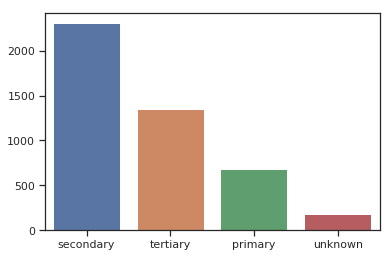

In [0]:
# barplot for the variable 'education'
count_number_susbc = df["education"].value_counts()
sns.barplot(count_number_susbc.index, count_number_susbc.values)

df['education'].value_counts()


secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

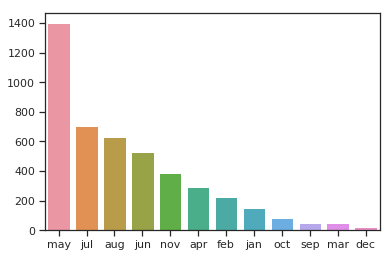

In [0]:
# barplot for the variable 'month'
count_number_susbc = df["month"].value_counts()
sns.barplot(count_number_susbc.index, count_number_susbc.values)

df['education'].value_counts()


Text(0.5, 1.0, 'Histogram for Yes and No Events w.r.t. IV')

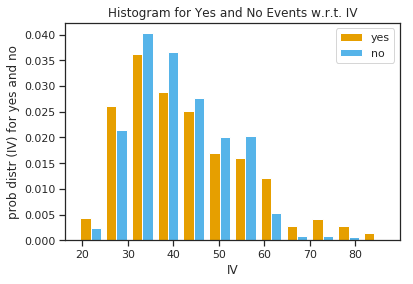

In [0]:
# generate separate list for each subscription type for age

x1 = list(df[df['y'] == 'yes']['age'])
x2 = list(df[df['y'] == 'no']['age'])

# assign colors for each subscription type 
colors = ['#E69F00', '#56B4E9']
names = ['yes', 'no']

# plot the histogram
plt.hist([x1, x2], bins = int(180/15), density=True,
         color = colors, label=names)

# plot formatting
plt.legend()
plt.xlabel('IV')
plt.ylabel('prob distr (IV) for yes and no')
plt.title('Histogram for Yes and No Events w.r.t. IV')


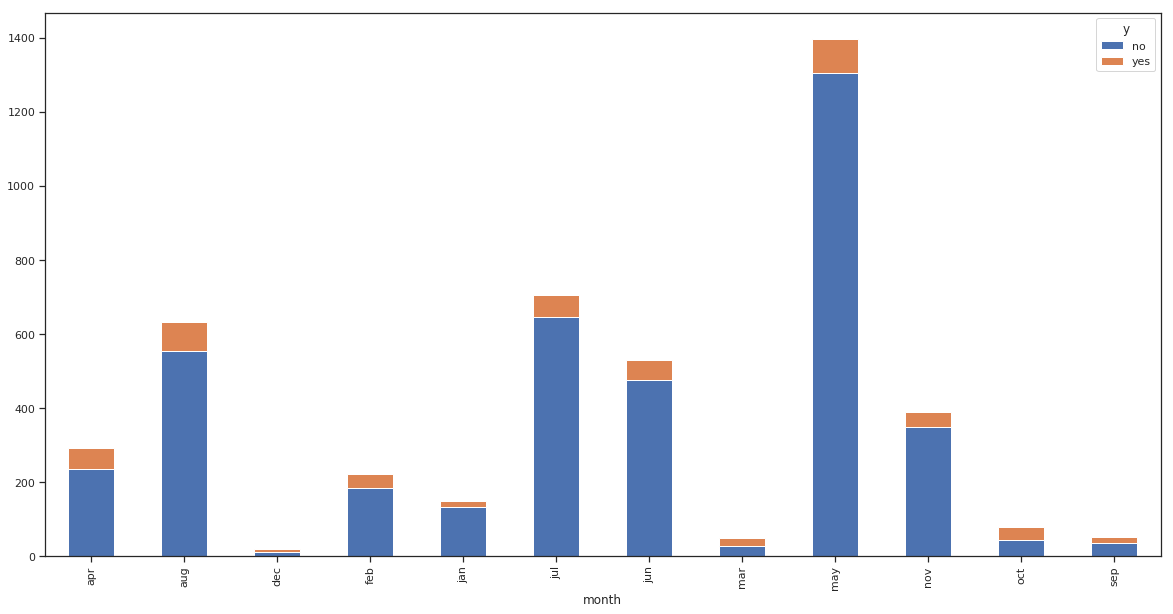

In [0]:
df.groupby(["month", "y"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10))